# Лабораторная работа №4

ФИО:   
Группа:

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №8 в семестре (Занятие №4 очное)

Что необходимо сделать:  
- Обучить различные модели глубокого обучения на имеющихся данных  

---
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/1k2MYXEp_OVQrink_XRC1PwoM0ZuNMeNz4VTWY7cI3hE/edit?usp=sharing) необходимо узнать название своего датасета
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. Загрузить необходимые данные к себе и считать (read) их в переменную.
2. Понять, у вас задача классификации (бинарной или многоклассовой) или регрессии.
3. Сделать предобработку данных:  
     1. Разделить выборку на тренировочную (train) и тестовую (test). _Обратите внимание, что обучать скейлеры и определять, какими значениями вы будете заполнять пропуски, вы будете на train выборке, а применять и на train, и на test_.
     2. Проверить пропуски в данных. Если они есть, заполнить одной из стратегий, предложенных в ноутбуке для семинара №3. P.S. Для численных и категориальных переменных будут разные стратегии.
     3. Отнормировать численные переменные (`StandardScaler`, `MinMaxScaler`).
     4. Закодировать категориальные признаки по одной из стратегий.
4. Оформить данные в виде класса `Dataset` из библиотеки `torch` (как мы это делали на семинаре), а затем засунуть в `Dataloader` (тоже делали на семинаре).
5. Обучить на тренировочном множестве:
     1. Очень простую однослойную нейросеть с оптимизатором `SGD` ([link](https://pytorch.org/docs/stable/optim.html)).
     2. Нейросеть посложнее (с 1 скрытым слоем) с оптимизатором `Adam` ([link](https://pytorch.org/docs/stable/optim.html)).
     3. Нейросеть еще сложнее (с 3+ скрытыми слоями) с оптимизатором `Adam` ([link](https://pytorch.org/docs/stable/optim.html)).
6. Посчитайте loss на train и test множествах, в зависимости от эпохи обучения. Провизуализируйте это с помощью библиотеки `matplotlib` (выйдет так называемая **learning curve**, кривая обучения модели).
6. Посчитайте метрики на train и test множествах:
     1. Для задачи классификации -- Accuracy
     2. Для задачи регрессии -- MAE
7. Сравните метрики относительно train/test, так и относительно разных моделей. Ответьте на следующие вопросы:
     1. Какая модель справилась лучше с поставленной задачей?
     2. Имеет ли место переобучение?
     3. Имеет ли место недообучение?
     4. Как можно улучшить метрики моделей?

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

P.S.S.  
Если вам повезло с многоклассовой классификацией, у вас не будет проблем, просто нужно будет поставить необходимое количество нейронов на выходе вашей нейросети.

# 1. Импорт данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
url = '/content/drive/My Drive/spotify-2023.csv'
data = pd.read_csv(url, sep=',', encoding='latin-1')
data

Mounted at /content/drive


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


# 2. Понимаем, какая перед нами задача

Так как целевая переменная streams является непрерывной числовой переменной, перед нами задача регрессии.

# 3. Делаем предобработку данных

## 3A. Заполние пропусков в данных

In [2]:
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')
data['in_deezer_playlists'] = data['in_deezer_playlists'].str.replace(',', '').astype(int)

In [3]:
data.isnull().sum()

,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,1
in_apple_playlists,0


Так как streams является целевой переменной, строку с пропуском в ней удалим, чтобы избежать неккоректных выводов

In [4]:
data = data.dropna(subset=['streams'])

Пропуски в in_shazam_charts заменим на 0, тк это скорее всего значит, что трек не находится в чартах шазам

Переведем значения колонки в int, убрав запятые из чисел

In [5]:
data['in_shazam_charts'] = data['in_shazam_charts'].fillna(0).astype(str)
data['in_shazam_charts'] = data['in_shazam_charts'].str.replace(',', '').astype(float)

<ipython-input-5-2f7ab61d35f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['in_shazam_charts'] = data['in_shazam_charts'].fillna(0).astype(str)
<ipython-input-5-2f7ab61d35f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['in_shazam_charts'] = data['in_shazam_charts'].str.replace(',', '').astype(float)


Пропуски в категориальной переменной key заменим отдельную категорию unknown

In [6]:
data['key'].fillna("unknown", inplace=True)

<ipython-input-6-a68a2d48bf21>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['key'].fillna("unknown", inplace=True)
<ipython-input-6-a68a2d48bf21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['key'].fillna("unknown", inplace=True)


In [7]:
data.isnull().sum()

,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,0
in_apple_playlists,0


## 3B. Разделение данных на тренировочную и тестовую выборки

Удалим из выборок названия треков (track_name) и исполнителей (artist(s)_name), так как они не влияют на предсказание целевой переменной

In [8]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['streams', 'track_name', 'artist(s)_name'])
y = data['streams']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

print("Размеры данных:")
print(f"Тренировочная выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")

Размеры данных:
Тренировочная выборка: (761, 21)
Тестовая выборка: (191, 21)


## 3C. Нормализация числовых переменных

In [9]:
from sklearn.preprocessing import StandardScaler

standart = StandardScaler()

num_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[num_columns] = standart.fit_transform(X_train[num_columns])
X_test[num_columns] = standart.transform(X_test[num_columns])
X_train.head()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
691,-0.643815,0.040669,1.131396,-1.071855,-0.180502,-0.625032,-0.531348,0.642461,-0.206054,-0.452894,...,-1.497919,E,Minor,-0.801070,-1.404945,-1.093999,2.526721,8.205955,-0.521030,-0.716261
804,-0.643815,0.323743,-0.273618,-0.085938,-0.401113,-0.625032,-0.753895,-1.032631,-0.325457,-0.452894,...,-1.067518,E,Minor,-0.113561,-0.978440,0.040731,-0.146196,-0.195500,-0.739248,-0.321279
872,-0.643815,0.323743,-0.273618,-0.195485,-0.061902,-0.019688,1.049906,4.323766,-0.195361,0.045158,...,-1.210985,D#,Minor,0.848952,0.130474,-0.496773,-0.533576,-0.195500,-0.739248,-0.123789
327,-0.643815,0.418101,-0.554621,-0.743216,-0.648631,-0.625032,-0.777321,-1.032631,-0.329021,-0.452894,...,-1.067518,A#,Minor,0.230194,-0.466634,-1.989838,2.023128,-0.195500,-0.593769,-0.518770
916,-0.643815,0.323743,0.850394,-0.085938,-0.609968,-0.625032,-0.742182,-1.032631,-0.327239,-0.452894,...,-1.031651,D,Major,0.711450,0.983484,-0.138437,-0.804741,-0.195500,-0.230071,-0.420025


## 3D. Кодирование категориальных признаков



Выбираем One-Hot Encoding, так как порядок категорий не важен

In [10]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
cat_columns = X_train.select_dtypes(include=['object']).columns
cat_columns

Index(['key', 'mode'], dtype='object')

In [11]:
cat_ohe = ohe.fit_transform(X_train[cat_columns]).toarray()
#fit_transform() обучает OneHotEncoder на данных X_train и выполняет преобразование категориальных колонок в "one-hot" векторы.
#toarray() преобразует результат в массив numpy

X_train[ohe.get_feature_names_out().tolist()] = cat_ohe #Добавление закодированных признаков в X_train
#get_feature_names_out() возвращает имена новых колонок
X_train = X_train.drop(columns=cat_columns, axis=1) #Удаление исходных категориальных признаков из X_train

cat_ohe_test = ohe.transform(X_test[cat_columns]).toarray()
#transform() применяет обученный OneHotEncoder к X_test

X_test[ohe.get_feature_names_out().tolist()] = cat_ohe_test
X_test = X_test.drop(columns=cat_columns, axis=1)

X_train.head()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,...,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,key_unknown,mode_Major,mode_Minor
691,-0.643815,0.040669,1.131396,-1.071855,-0.180502,-0.625032,-0.531348,0.642461,-0.206054,-0.452894,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
804,-0.643815,0.323743,-0.273618,-0.085938,-0.401113,-0.625032,-0.753895,-1.032631,-0.325457,-0.452894,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
872,-0.643815,0.323743,-0.273618,-0.195485,-0.061902,-0.019688,1.049906,4.323766,-0.195361,0.045158,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
327,-0.643815,0.418101,-0.554621,-0.743216,-0.648631,-0.625032,-0.777321,-1.032631,-0.329021,-0.452894,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
916,-0.643815,0.323743,0.850394,-0.085938,-0.609968,-0.625032,-0.742182,-1.032631,-0.327239,-0.452894,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## 3E. Логарифмирование целевой переменной

Так как распределение целевой переменной сильно смещено вправо и целевая переменная охватывает большой диапазон значений, проведем ее логарифмирование.

In [12]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)
y_train_log.head()

,streams
691,19.460545
804,17.797124
872,19.497274
327,18.038204
916,17.804261


# 4. Оформить данные в виде класса Dataset из библиотеки torch (как мы это делали на семинаре), а затем засунуть в Dataloader (тоже делали на семинаре).

## 4A. Оформление данных в виде класса Dataset

In [13]:
from torch.utils.data import Dataset
import torch

class MyDataset(Dataset):
    def __init__(self, features, targets, transform=None, target_transform=None):
        self.features = features.values
        self.targets = targets.values
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return self.features.shape[0]


    def __getitem__(self, idx):
        inputs = self.features[idx]
        target = self.targets[idx]

        # Применение преобразований, если они заданы
        if self.transform:
            inputs = self.transform(inputs)
        if self.target_transform:
            target = self.target_transform(target)

        return torch.tensor(inputs, dtype=torch.float32), torch.tensor(target, dtype=torch.float32)

In [14]:
def to_tensor(inputs):
    return torch.tensor(inputs, dtype=torch.float32)

In [15]:
# Создаем объекты датасетов
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train_log = y_train_log.reset_index(drop=True)
y_test_log = y_test_log.reset_index(drop=True)

print(len(X_train), len(y_train_log))
train_dataset = MyDataset(X_train, y_train_log)
test_dataset = MyDataset(X_test, y_test_log)

761 761


## 4B. Dataloader

In [16]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 5. Обучение на тренировочном множестве

## 5A. Однослойная нейросеть с оптимизатором SGD

In [17]:
from torch import nn
import torch.optim as optim

class FirstNet(nn.Module):
    def __init__(self, input_size, output_size):
        super(FirstNet, self).__init__()
        self.fc = nn.Linear(input_size, output_size)  # Один полносвязный слой

    def forward(self, x):
        return self.fc(x)

# Инициализация модели
input_size = X_train.shape[1]  # Количество признаков
output_size = 1   # Задача регрессии, поэтому один выход
model = FirstNet(input_size, output_size)

criterion = nn.L1Loss()      # Функция потерь MAE (Mean Absolute Error)
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Обучение модели

num_epochs = 20  # Количество эпох
train_losses_1 = []  # Список для хранения значений потерь на train
test_losses_1 = []   # Список для хранения значений потерь на test

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch_idx, (inputs, targets) in enumerate(train_loader):
        # Обнуляем градиенты
        optimizer.zero_grad()

        # Прямой проход
        outputs = model(inputs)

        # Вычисление потерь
        loss = criterion(outputs, targets)

        # Обратный проход и обновление весов
        loss.backward()
        optimizer.step()

        # Суммируем потери для вывода
        total_loss += loss.item()

    train_losses_1.append(total_loss / len(train_loader))

    # Оценка модели на тестовом множестве
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets.view(-1, 1))
            test_loss += loss.item()

    test_losses_1.append(test_loss / len(test_loader))

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses_1[-1]:.4f}, Test Loss: {test_losses_1[-1]:.4f}")


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:128: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:128: UserWarning: Using a target size (torch.Size([57])) that is different to the input size (torch.Size([57, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch [1/20], Train Loss: 19.3930, Test Loss: 19.4133
Epoch [2/20], Train Loss: 19.2027, Test Loss: 19.2217
Epoch [3/20], Train Loss: 19.0107, Test Loss: 19.0301
Epoch [4/20], Train Loss: 18.8181, Test Loss: 18.8385
Epoch [5/20], Train Loss: 18.6280, Test Loss: 18.6467
Epoch [6/20], Train Loss: 18.4322, Test Loss: 18.4551
Epoch [7/20], Train Loss: 18.2419, Test Loss: 18.2634
Epoch [8/20], Train Loss: 18.0493, Test Loss: 18.0717
Epoch [9/20], Train Loss: 17.8559, Test Loss: 17.8801
Epoch [10/20], Train Loss: 17.6616, Test Loss: 17.6886
Epoch [11/20], Train Loss: 17.4709, Test Loss: 17.4969
Epoch [12/20], Train Loss: 17.2789, Test Loss: 17.3054
Epoch [13/20], Train Loss: 17.0874, Test Loss: 17.1138
Epoch [14/20], Train Loss: 16.8949, Test Loss: 16.9221
Epoch [15/20], Train Loss: 16.7023, Test Loss: 16.7304
Epoch [16/20], Train Loss: 16.5105, Test Loss: 16.5389
Epoch [17/20], Train Loss: 16.3172, Test Loss: 16.3474
Epoch [18/20], Train Loss: 16.1215, Test Loss: 16.1558
Epoch [19/20], Trai

## 5B. Нейросеть с 1 скрытым слоем с оптимизатором Adam

In [18]:

class SecondNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SecondNet, self).__init__()
        # Скрытый слой (input_size -> hidden_size)
        self.hidden = nn.Linear(input_size, hidden_size)
        # Выходной слой (hidden_size -> output_size)
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Прямой проход (с применением активации ReLU на скрытом слое)
        x = torch.relu(self.hidden(x))
        x = self.output(x)
        return x

# Создание датасета
train_dataset = MyDataset(X_train, y_train_log)

# Создаем DataLoader для тренировки
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

input_size = X_train.shape[1]  # Количество признаков
hidden_size = 64  # Количество нейронов в скрытом слое
output_size = 1  # Один выход (для задачи регрессии)
model = SecondNet(input_size, hidden_size, output_size)

criterion =  nn.L1Loss()      # Функция потерь MAE (Mean Absolute Error)

optimizer = optim.Adam(model.parameters(), lr=0.001)

#Обучение модели
num_epochs = 20  # Количество эпох
train_losses_2 = []  # Список для хранения значений потерь на train
test_losses_2 = []   # Список для хранения значений потерь на test
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch_idx, (inputs, targets) in enumerate(train_loader):
        # Обнуляем градиенты
        optimizer.zero_grad()

        # Прямой проход
        outputs = model(inputs)

        # Вычисление потерь
        loss = criterion(outputs, targets)

        # Обратный проход и обновление весов
        loss.backward()
        optimizer.step()

        # Суммируем потери для вывода
        total_loss += loss.item()

    train_losses_2.append(total_loss / len(train_loader))

    # Оценка модели на тестовом множестве
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets.view(-1, 1))
            test_loss += loss.item()

    test_losses_2.append(test_loss / len(test_loader))

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses_2[-1]:.4f}, Test Loss: {test_losses_2[-1]:.4f}")


Epoch [1/20], Train Loss: 19.3447, Test Loss: 19.2486
Epoch [2/20], Train Loss: 19.0541, Test Loss: 18.9517
Epoch [3/20], Train Loss: 18.7503, Test Loss: 18.6239
Epoch [4/20], Train Loss: 18.4064, Test Loss: 18.2483
Epoch [5/20], Train Loss: 18.0055, Test Loss: 17.8080
Epoch [6/20], Train Loss: 17.5346, Test Loss: 17.2848
Epoch [7/20], Train Loss: 16.9749, Test Loss: 16.6703
Epoch [8/20], Train Loss: 16.3200, Test Loss: 15.9489
Epoch [9/20], Train Loss: 15.5475, Test Loss: 15.1074
Epoch [10/20], Train Loss: 14.6568, Test Loss: 14.1398
Epoch [11/20], Train Loss: 13.6287, Test Loss: 13.0288
Epoch [12/20], Train Loss: 12.4633, Test Loss: 11.7789
Epoch [13/20], Train Loss: 11.1524, Test Loss: 10.3708
Epoch [14/20], Train Loss: 9.6723, Test Loss: 8.8077
Epoch [15/20], Train Loss: 8.0478, Test Loss: 7.0943
Epoch [16/20], Train Loss: 6.3057, Test Loss: 5.3607
Epoch [17/20], Train Loss: 4.6878, Test Loss: 4.0824
Epoch [18/20], Train Loss: 3.5938, Test Loss: 3.3956
Epoch [19/20], Train Loss: 2.

## 5C. Нейросеть с 3+ скрытыми слоями с оптимизатором Adam

In [19]:
class ThirdNet(nn.Module):
    def __init__(self, input_size, output_size):
        super(ThirdNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)  # Первый скрытый слой
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)  # Второй скрытый слой
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 32)  # Третий скрытый слой
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(32, output_size)  # Выходной слой

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.relu3(self.fc3(x))
        return self.fc4(x)

# Инициализация модели
input_size = X_train.shape[1]  # Количество признаков
output_size = 1   # Задача регрессии, поэтому один выход
model = ThirdNet(input_size, output_size)

nn.L1Loss()      # Функция потерь MAE (Mean Absolute Error)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Обучение модели
num_epochs = 20  # Количество эпох
train_losses_3 = []  # Список для хранения значений потерь на train
test_losses_3 = []   # Список для хранения значений потерь на test

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch_idx, (inputs, targets) in enumerate(train_loader):
        # Обнуляем градиенты
        optimizer.zero_grad()

        # Прямой проход
        outputs = model(inputs)

        # Вычисление потерь
        loss = criterion(outputs, targets.view(-1, 1))

        # Обратный проход и обновление весов
        loss.backward()
        optimizer.step()

        # Суммируем потери для вывода
        total_loss += loss.item()

    train_losses_3.append(total_loss / len(train_loader))

    # Оценка модели на тестовом множестве
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets.view(-1, 1))
            test_loss += loss.item()

    test_losses_3.append(test_loss / len(test_loader))

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses_3[-1]:.4f}, Test Loss: {test_losses_3[-1]:.4f}")

Epoch [1/20], Train Loss: 19.4400, Test Loss: 19.3016
Epoch [2/20], Train Loss: 18.8982, Test Loss: 18.4344
Epoch [3/20], Train Loss: 17.4358, Test Loss: 16.0045
Epoch [4/20], Train Loss: 13.4585, Test Loss: 9.8145
Epoch [5/20], Train Loss: 5.7578, Test Loss: 3.3276
Epoch [6/20], Train Loss: 3.6980, Test Loss: 2.4449
Epoch [7/20], Train Loss: 2.6376, Test Loss: 2.1431
Epoch [8/20], Train Loss: 2.1425, Test Loss: 2.0028
Epoch [9/20], Train Loss: 1.9179, Test Loss: 1.8669
Epoch [10/20], Train Loss: 1.7417, Test Loss: 1.8091
Epoch [11/20], Train Loss: 1.6480, Test Loss: 1.7314
Epoch [12/20], Train Loss: 1.5366, Test Loss: 1.6782
Epoch [13/20], Train Loss: 1.4468, Test Loss: 1.6220
Epoch [14/20], Train Loss: 1.3726, Test Loss: 1.5998
Epoch [15/20], Train Loss: 1.3107, Test Loss: 1.5159
Epoch [16/20], Train Loss: 1.2307, Test Loss: 1.4893
Epoch [17/20], Train Loss: 1.1762, Test Loss: 1.4556
Epoch [18/20], Train Loss: 1.1221, Test Loss: 1.4038
Epoch [19/20], Train Loss: 1.0665, Test Loss: 1.

# 6. Визуализация кривой обучений (learning rate)

Признаки оптимального окончания обучения:

Метрики на тестовых данных перестают улучшаться (выходят на плато).

Разница между ошибками на обучающей и тестовой выборках становится стабильной или начинает увеличиваться (признак переобучения).

## 6A. Однослойная нейросеть

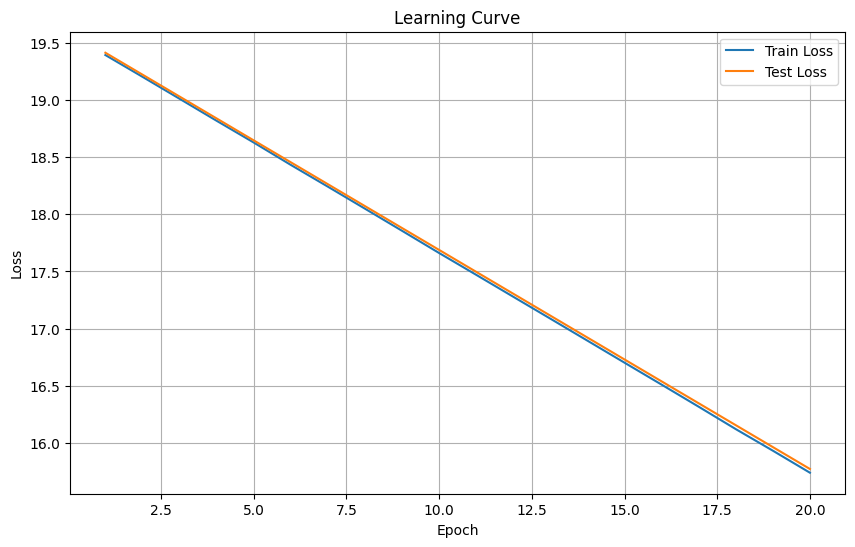

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses_1, label='Train Loss')
plt.plot(range(1, num_epochs + 1), test_losses_1, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

## 6B. Нейросеть с одним скрытым слоем

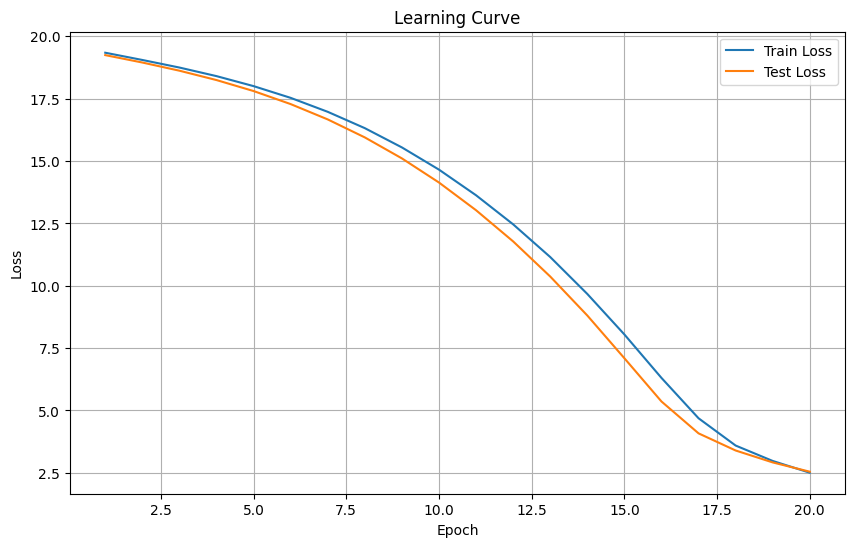

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses_2, label='Train Loss')
plt.plot(range(1, num_epochs + 1), test_losses_2, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

## Нейросеть с 3 скрытыми слоями

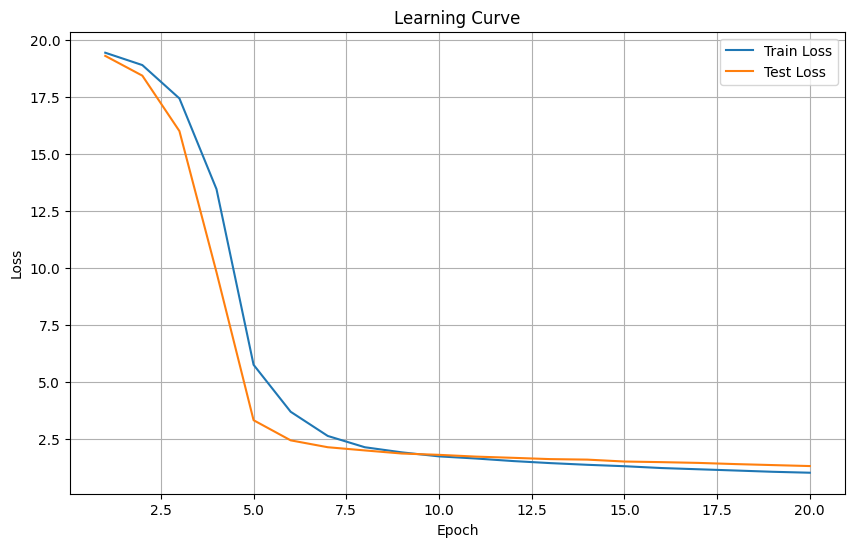

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses_3, label='Train Loss')
plt.plot(range(1, num_epochs + 1), test_losses_3, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

# 7. Метрики

In [23]:
def find_best_epoch(losses):
    best_epoch = 0
    best_loss = float('inf')

    for epoch in range(len(losses)):
        loss = losses[epoch]

        if loss < best_loss:
            best_loss = loss
            best_epoch = epoch + 1

    return best_epoch, best_loss

best_epoch1, best_loss1 = find_best_epoch(test_losses_1)
best_epoch2, best_loss2= find_best_epoch(test_losses_2)
best_epoch3, best_loss3 = find_best_epoch(test_losses_3)

results = {
    "Model": ["SimpleNN", "NNWithOneHidden", "NNWithThreeHidden"],
    "Best Epoch": [best_epoch1, best_epoch2, best_epoch3],
    "Test MAE": [best_loss1, best_loss2, best_loss3],
    "Train MAE": [
        train_losses_1[best_epoch1 - 1],
        train_losses_2[best_epoch2 - 1],
        train_losses_3[best_epoch3 - 1],
    ]
}

pd.DataFrame(results).round(4)

,Model,Best Epoch,Test MAE,Train MAE
0,SimpleNN,20,15.7727,15.7400
1,NNWithOneHidden,20,2.5450,2.5045
2,NNWithThreeHidden,20,1.3175,1.0253


# 8. Сравнение метрик train/test для разных моделей


## Какая модель справилась лучше с поставленной задачей?

Модель NNWithThreeHidden показывает наименьшее значение MAE как на обучающей (1.0166), так и на тестовой (1.4050) выборках. Это означает, что она лучше всего справляется с поставленной задачей по сравнению с другими моделями, потому что достигает наилучшей точности (по минимизации ошибки) как на обучающих, так и на тестовых данных.

## Имеет ли место переобучение?

Если разница между ошибками на train и test велика (ошибка на train намного ниже), модель переобучилась.

SimpleNN:

Train MAE ≈ Test MAE (15.8522 ≈ 15.8354)

Разница небольшая, признаков переобучения нет.


NNWithOneHidden:

Train MAE = 2.1537, Test MAE = 2.3718

Разница небольшая, признаков переобучения нет.


NNWithThreeHidden:

Train MAE = 1.0166, Test MAE = 1.4050

также есть небольшая разница между обучающей и тестовой ошибкой, но эта разница больше, чем в предыдущих моделях, что говорит о хорошем обобщении, но всё же возможном незначительном переобучении.

## 3. Имеет ли место недообучение?

Недообучение проявляется, если высоки ошибки на Train и Test.

SimpleNN: Значения MAE на обучающем и тестовом наборе схожи и довольно высоки, что указывает на возможное недообучение этой модели. Она не способна эффективно захватывать зависимости в данных.

NNWithOneHidden и NNWithThreeHidden: Обе модели имеют значительно более низкие значения MAE, что говорит о хорошем обучении, и отсутствие признаков недообучения.

## Как можно улучшить метрики моделей?

1. Для однослойной сети:

- Добавить скрытые слои (например, как в сети с 1 скрытым слоем).
- Использовать более сложный оптимизатор, например, Adam вместо SGD.
- Увеличить число эпох, так как Loss ещё снижается на последней эпохе.

2. Для сетей со скрытыми слоями:

- Добавить регуляризацию, такую как Dropout или L2-регуляризацию, чтобы уменьшить переобучение.
- Увеличить размер тестовой выборки для более надёжной оценки.
- Уменьшить количество нейронов в слоях, так как модель может быть излишне сложной для задачи.

как улучшить недообучение
1. Увеличение сложности модели

Добавить слои: Увеличьте количество скрытых слоев в модели.

Увеличить количество нейронов: Добавьте больше нейронов в скрытые слои.
2. Улучшение качества обучения

Увеличить число итераций, чтобы градиентный спуск достиг минимума